In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
csv_path='/content/drive/MyDrive/Machine_Learning/customer_churn_large_dataset.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
customer_df=pd.read_csv(csv_path)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
customer_df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [7]:
customer_df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [8]:
customer_df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [9]:
customer_df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

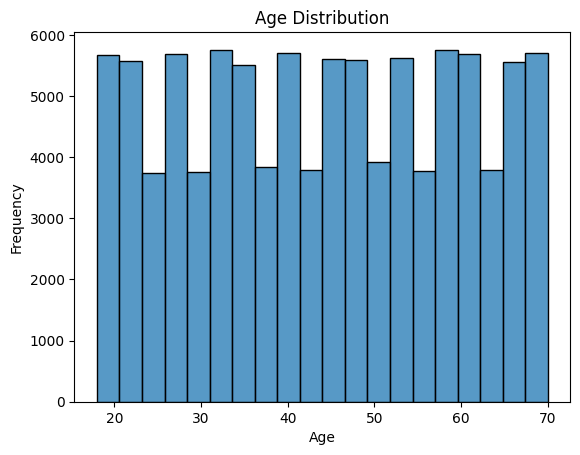

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example for numerical feature
sns.histplot(customer_df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

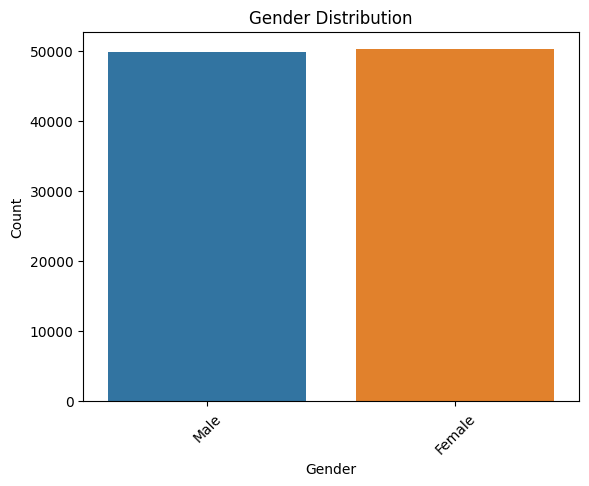

In [11]:
sns.countplot(data=customer_df, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()

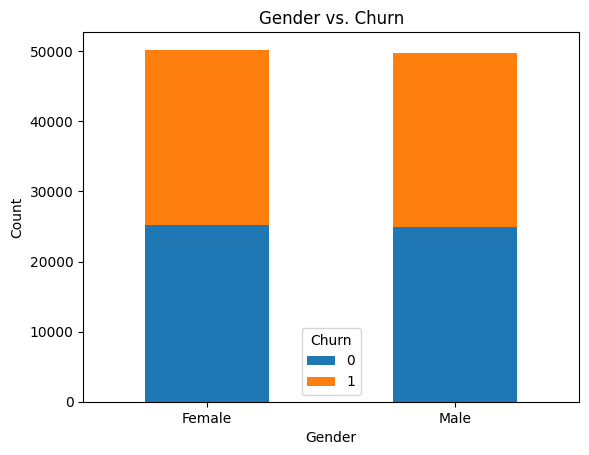

In [12]:
pd.crosstab(customer_df['Gender'], customer_df['Churn']).plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs. Churn')
plt.xticks(rotation=0)
plt.show()

In [13]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

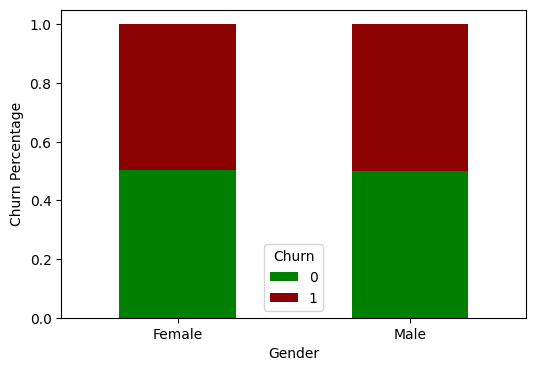

In [14]:
stacked_plot(customer_df,'Gender','Churn')

From above plots, we can say following:

Gender alone does not help us predict the customer churn.

In [15]:
customer_df['Subscription_Length_Months'].describe()

count    100000.000000
mean         12.490100
std           6.926461
min           1.000000
25%           6.000000
50%          12.000000
75%          19.000000
max          24.000000
Name: Subscription_Length_Months, dtype: float64

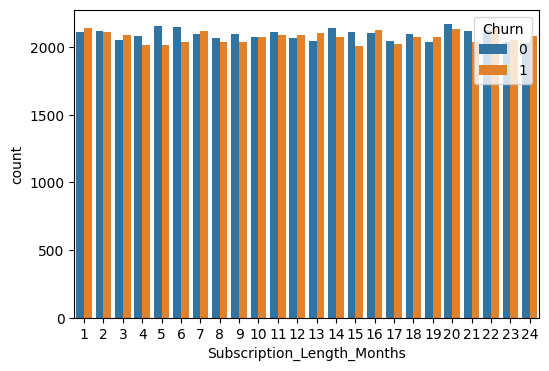

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x="Subscription_Length_Months", hue="Churn", data=customer_df)
plt.show()

In [17]:
def tenure(t):
    if t<=6:
        return 1
    elif t>6 and t<=12:
        return 2
    elif t>12 and t<=18:
        return 3
    else:
        return 4


customer_df["tenure_group"]=customer_df["Subscription_Length_Months"].apply(lambda x: tenure(x))

In [18]:
customer_df.groupby(['Churn'])["tenure_group"].value_counts()

Churn  tenure_group
0      1               12657
       3               12542
       2               12511
       4               12511
1      4               12515
       2               12446
       3               12411
       1               12407
Name: tenure_group, dtype: int64

<Axes: xlabel='tenure_group', ylabel='count'>

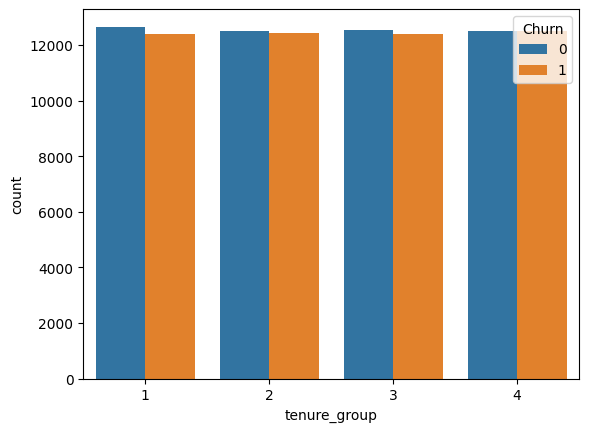

In [19]:
sns.countplot(x="tenure_group", hue="Churn", data=customer_df)

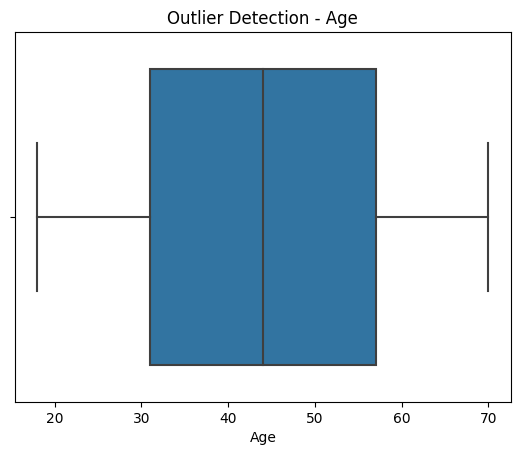

In [20]:
sns.boxplot(data=customer_df, x='Age')
plt.xlabel('Age')
plt.title('Outlier Detection - Age')
plt.show()

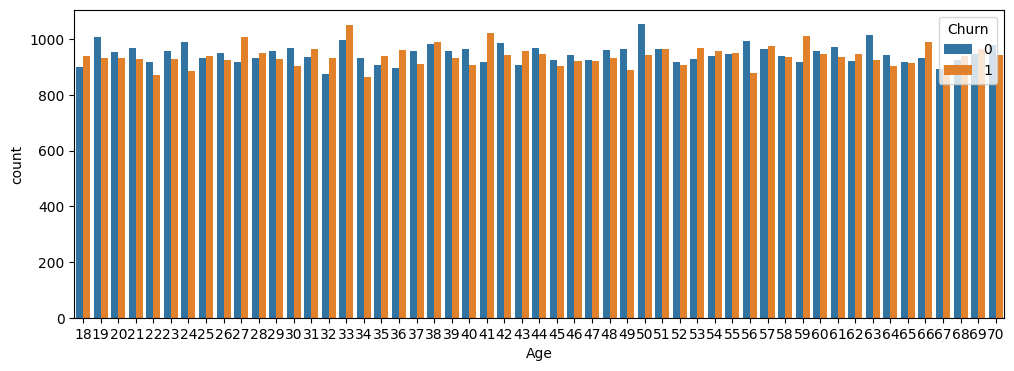

In [21]:
plt.figure(figsize=(12,4))
sns.countplot(x="Age", hue="Churn", data=customer_df)
plt.show()

In [22]:
customer_df['Age'].value_counts().sort_index()

18    1839
19    1941
20    1886
21    1897
22    1787
23    1887
24    1876
25    1871
26    1874
27    1924
28    1881
29    1885
30    1875
31    1901
32    1810
33    2046
34    1797
35    1845
36    1859
37    1870
38    1970
39    1891
40    1875
41    1939
42    1930
43    1863
44    1916
45    1827
46    1865
47    1847
48    1895
49    1854
50    1996
51    1929
52    1824
53    1895
54    1896
55    1900
56    1872
57    1942
58    1876
59    1928
60    1904
61    1909
62    1867
63    1942
64    1848
65    1833
66    1922
67    1798
68    1863
69    1912
70    1921
Name: Age, dtype: int64

In [23]:
def age_group(age):
    if age < 20:
        return "Teenage"
    elif 20 <= age < 30:
        return "In 20's"
    elif 30 <= age < 40:
        return "In 30's"
    elif 40 <= age < 50:
        return "In 40's"
    elif 50 <= age < 60:
        return "In 50's"
    elif 60 <= age < 70:
        return "In 60's"
    else:
        return "70's and 70+"

customer_df["age_group"] = customer_df["Age"].apply(lambda x: age_group(x))


<Axes: xlabel='age_group', ylabel='count'>

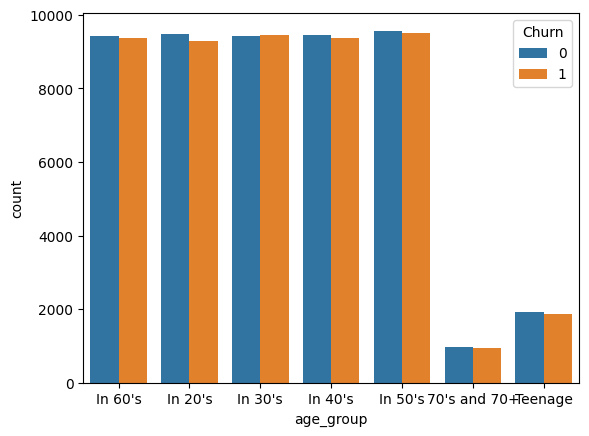

In [24]:
sns.countplot(x="age_group", hue="Churn", data=customer_df)

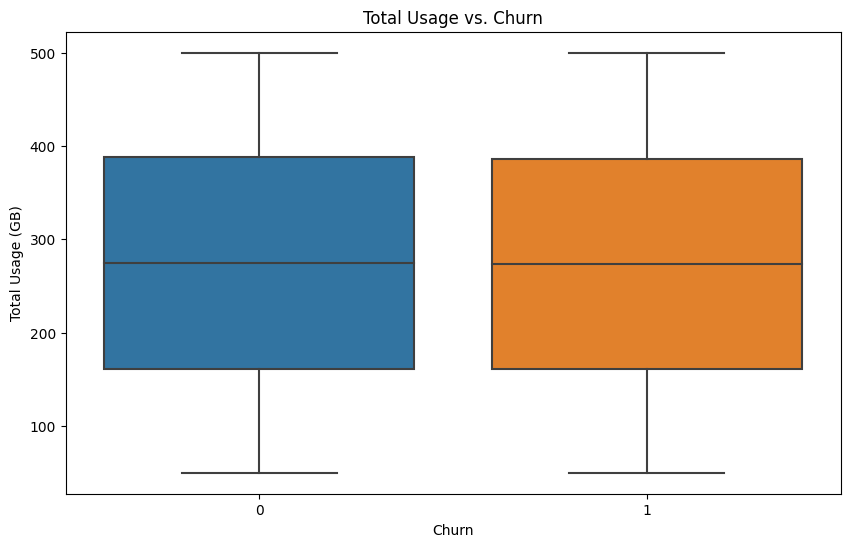

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Total_Usage_GB', data=customer_df)
plt.title('Total Usage vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Usage (GB)')
plt.show()

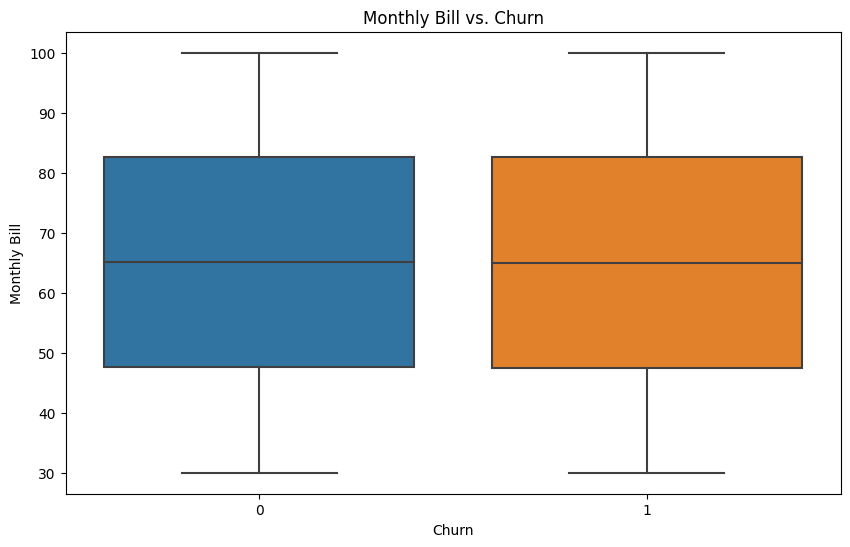

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Monthly_Bill', data=customer_df)
plt.title('Monthly Bill vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Bill')
plt.show()


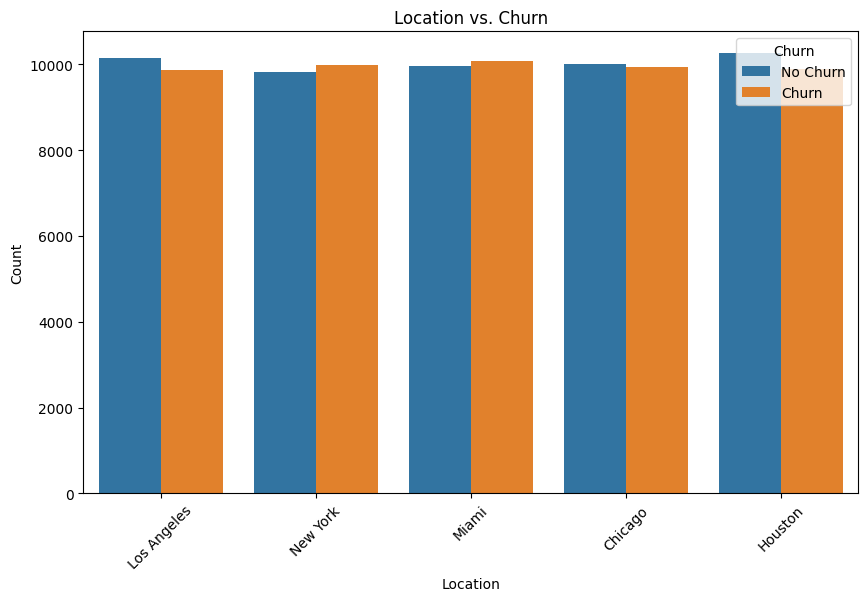

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', hue='Churn', data=customer_df)
plt.title('Location vs. Churn')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [28]:
# Feature Engineering: Create 'Usage per Bill' feature
customer_df['Usage_per_Bill'] = customer_df['Total_Usage_GB'] / customer_df['Monthly_Bill']

# Check the new feature
print(customer_df[['Usage_per_Bill', 'Total_Usage_GB', 'Monthly_Bill']].head())


   Usage_per_Bill  Total_Usage_GB  Monthly_Bill
0        3.217012             236         73.36
1        3.527482             172         48.76
2        5.382005             460         85.47
3        3.032469             297         97.94
4        4.575163             266         58.14


In [29]:
customer_df.columns


Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn',
       'tenure_group', 'age_group', 'Usage_per_Bill'],
      dtype='object')

In [30]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier




# Define features and target variable
features = ['Age', 'Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Usage_per_Bill']
target = 'Churn'  # Assuming 'Churn' is the column you want to predict

# Preprocess the data
# Encode categorical features (e.g., 'Gender' and 'Location')
label_encoders = {}
for feature in ['Gender', 'Location']:
    le = LabelEncoder()
    customer_df[feature] = le.fit_transform(customer_df[feature])
    label_encoders[feature] = le

# Split the data into training and testing sets
X = customer_df[features]
y = customer_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (e.g., 'Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Usage_per_Bill')
scaler = StandardScaler()
X_train[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Usage_per_Bill']] = scaler.fit_transform(
    X_train[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Usage_per_Bill']])
X_test[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Usage_per_Bill']] = scaler.transform(
    X_test[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Usage_per_Bill']])

models = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
     'RandomForestClassifier': RandomForestClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Assuming X_train and y_train are defined
    y_pred = model.predict(X_test)  # Assuming X_test is defined

    accuracy = accuracy_score(y_test, y_pred)
    classification_report_output = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", classification_report_output)
    print("\n")


Model: Logistic Regression
Accuracy: 0.50255
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.63      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



Model: Gradient Boosting
Accuracy: 0.50655
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.59      0.55     10079
           1       0.50      0.43      0.46      9921

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.50     20000
weighted avg       0.51      0.51      0.50     20000



Model: RandomForestClassifier
Accuracy: 0.50225
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.52      0.52     10079
           1       0.50  

### still learning hyperparameters


In [ ]:
"""from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5],  # Maximum depth of the trees
    'min_samples_split': [2, 3, 4]  # Minimum number of samples required to split an internal node
}

# Create a GridSearchCV object for the Gradient Boosting model
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3)  # Cross-validation folds

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model from the grid search
best_gradient_boosting_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_gradient_boosting_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print("Model with Best Hyperparameters:")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_output)"""